### Entregable Final Base de Datos
Juan Pablo Cotera - A01741106

1. Descripción de la Base de Datos

La base de datos utilizada para el análisis proviene de Data Files © Original Authors y fue obtenida por medio de la página Kaggle dentro de la sección de databases.

Esta base de datos contiene 119,389 observaciones para un hotel urbano y uno turístico (de los cuales la ubicación no está especificada) en un lapso de tiempo desde el año 2015 hasta 2017.

Ahora bien vamos a revisar las características de las variables críticas del conjunto de datos:

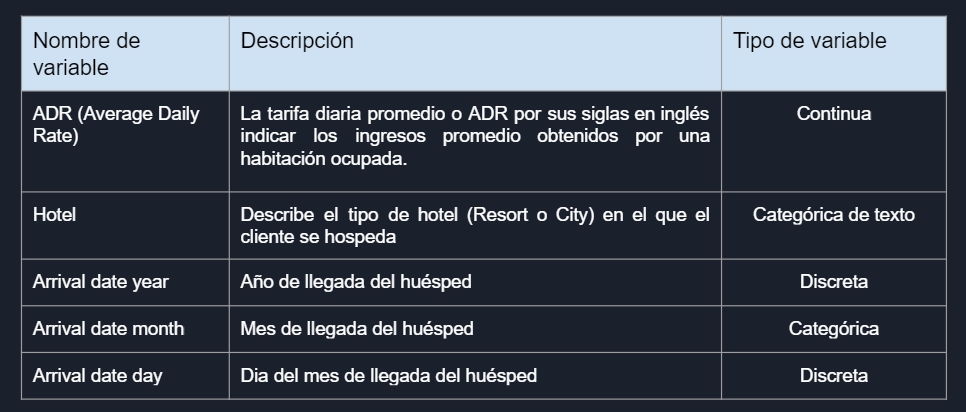
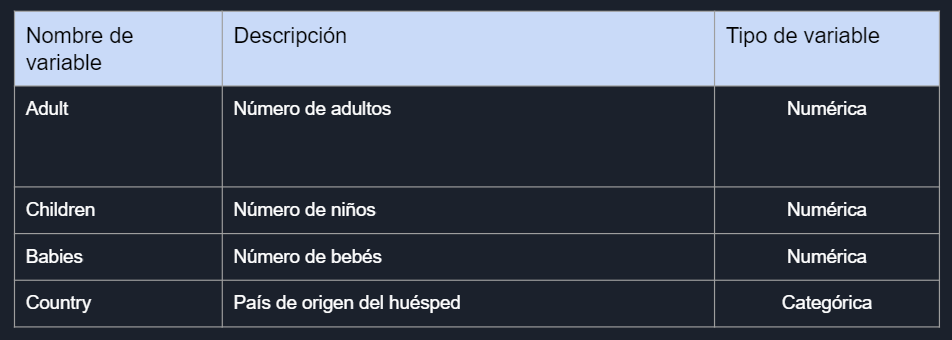
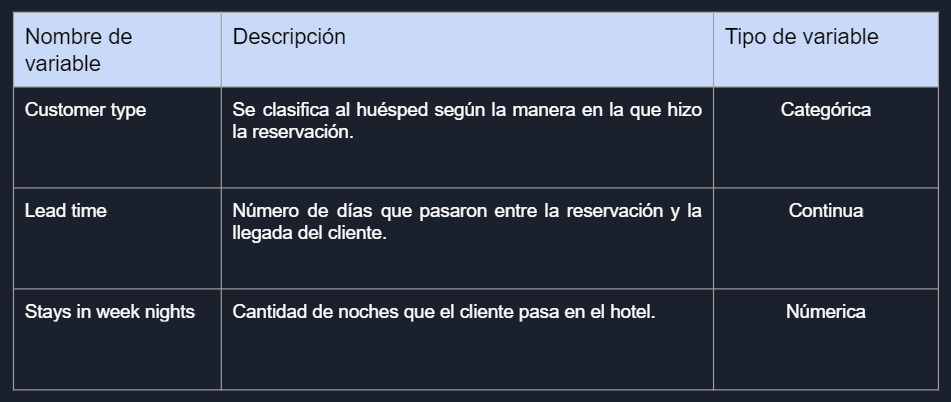

2. Estadística Descriptiva de los Datos

Es importante el realizar pruebas de normalidad y outliers en las variables que vamos a utilizar para el análisis, ya que por medio de estos supuestos podemos ofrecer confiabilidad en los resultados de nuestro análisis si es que estos se cumplen y no presentan variabilidad muy elevada entre los datos.



In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('datasets/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df[['adr','lead_time','adults','children','babies','arrival_date_year','stays_in_week_nights']].agg({'mean', 'std','kurtosis','min','max','var'})

,adr,lead_time,adults,children,babies,arrival_date_year,stays_in_week_nights
kurtosis,1013.189851,1.696449,1352.115116,18.673692,1633.948235,-0.994564,24.284555
std,50.535790,106.863097,0.579261,0.398561,0.097436,0.707476,1.908286
min,-6.380000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
max,5400.000000,737.000000,55.000000,10.000000,10.000000,2017.000000,50.000000
mean,101.831122,104.011416,1.856403,0.103890,0.007949,2016.156554,2.500302
var,2553.866100,11419.721511,0.335543,0.158851,0.009494,0.500522,3.641554


Aqui podemos observar estadísticas descriptivas de las variables críticas identificadas dentro de la base de datos, tanto como la media y la variabilidad de los datos, así como también su desviación estándar.

Ahora bien, para revisar la distribución de los datos será necesario el uso del gráfico de cajas para ver el comportamiento de cada variable.

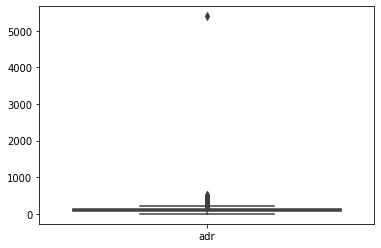

In [6]:
sns.boxplot(data=df.loc[:, ["adr"]])

plt.show()

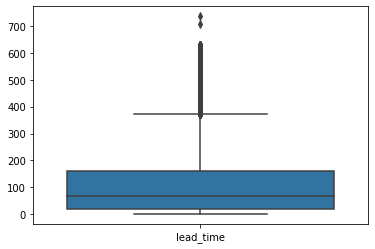

In [16]:
sns.boxplot(data=df.loc[:, ["lead_time"]])

plt.show()

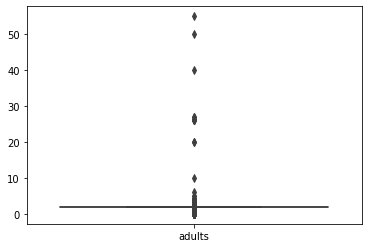

In [17]:
sns.boxplot(data=df.loc[:, ["adults"]])

plt.show()

En cuanto al comportamiento de estas variables que considero son las más importante del análisis, podemos observar que en cuanto al ADR existen algunos valores atípicos, sin embargo un ADR registrado de 5400 provoca que la distribución se vea de esa forma (sin este valor se pordría apreciar de una mejor forma que la mayoría de los ADR rondan entre los 90-150). En cuanto a las otras 2 variables podemos observar que lead_time tiene una distribución un poco mejor, sin embargo cuenta con un elevado número de outliers. Y el gráfico de adultos tiene outliers muy distantes arriba de 50 huéspedes en 1 sólo registro, pero la mayoría de los registros se encuentran en reservaciones de 2 huéspedes.

### Preguntas de Investigación acerca de la Base de Datos
Hipótesis 1: En el periodo de verano el ADR promedio incrementa.
Hipótesis 2: El ADR va a aumentar en función de la cantidad de adultos en la reservación.

# 1. Top 10 de los paises que más visitan los hoteles

Text(0, 0.5, 'count')

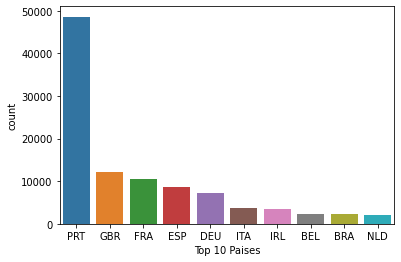

In [7]:
data = df['country'].value_counts().head(10)
sns.barplot(x=data.index, y=data.values,order=data.index)
plt.xlabel('Top 10 Paises')
plt.ylabel("count")

Dentro de los paises que más visistan los hoteles, Brasil es el único país no europeo, y Portugal es el que tiene la mayor cantidad de huéspedes que han visitado el hotel. Esto puede ayudar a los dueños y operadores de los hoteles a centralizar el mercado que buscan, así como también el realizar estudios acerca de en que se fijan los originarios de estos países para viajar, y entender más a sus clientes.

# 2. ¿Cuál es el hotel más visitado?

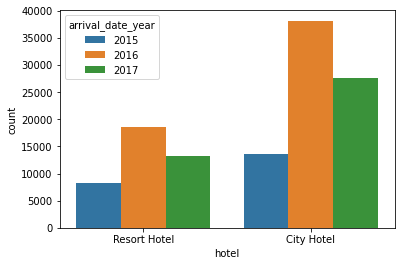

In [4]:
sns.countplot(data=df, x='hotel', hue='arrival_date_year')

Como podemos observar el hotel más vistado es el que se encuentra en la zona de la ciudad, por una diferencia del 100% de huéspedes en desde 2015 hasta 2017. Este gráfico ayuda a los directivos a identificar y priorizar la atención en el hotel de la zona urbana debido a que tiene un número de huéspedes mucho mayor que el de la zona del resort. Igualmente este gráfico nos ayuda a visualizar como es que se han comportado los huéspedes, observando que hubo un crecimiento tremendo en el año 2016, pero desgraciadamente decreció de forma significativa en el año 2017.

### 3. ¿Ha aumentado lo que gastan los huéspedes conforme los años?

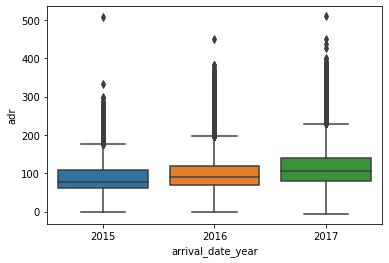

In [11]:
df_all=df
df_all['adr'].max()
df_all.drop(df_all['adr'].idxmax(),inplace=True)
df_all['adr'].max()
sns.boxplot(data=df, x='arrival_date_year', y='adr')

Como podemos observar en este gráfico de cajas, se puede observar como es que tanto la mediana como la media han ido aumentando año, y también los datos atípicos de los gráficos aparecen cada año con un promedio de valores más elevado. Es interesante el resaltar que, a pesar de que en el año 2017 hubo una baja en el número de clientes, el huésped promedio ha ido incrementando su consumo por cuarto. El poder visualizar los diagramas de cajas del adr se hizo de una mejor forma debido a que se retiró el dato atípico mencionado en la sección inicial.

# 4. El ADR promedio incrementa en el periodo de vaciones de verano (Junio-Agosto)

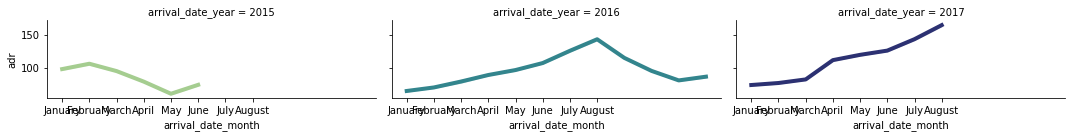

In [7]:
sns.relplot(
    data=df,
    x="arrival_date_month", y="adr", col="arrival_date_year", hue="arrival_date_year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=2.5, legend=False,
)

Como se puede observar en los gráficos de serie de tiempo, podemos ver como el ADR en los años 2016 y 2017 en efecto incrementa de forma significativa en periodo de vacaciones de verano (Junio-Agosto), lo que nos comprueba nuestra hipótesis 1. Este tipo de gráfico les ayudará a los stakeholders del hotel identificar las temporadas donde se tiene un mayor gasto por parte del cliente, y el estar preparados para cuando la demanda de servicio sea aún mayor que en temporadas más bajas.

# 5. ¿Qué tipo de relación existe entre el tipo de cliente y el ADR?

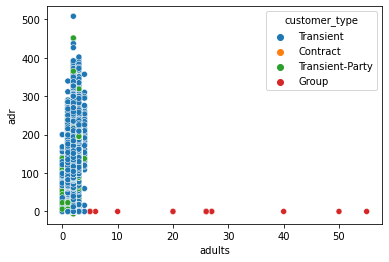

In [11]:
df_all=df
df_all['adr'].max()
df_all.drop(df_all['adr'].idxmax(),inplace=True)
df_all['adr'].max()
sns.scatterplot(data=df, x="adults", y="adr", hue='customer_type')

Como podemos observar la relación que existe entre la cantidad de adultos y el adr promedio es inversa, debido a que mientra más adultos estén registrados dentro de la reservación, su consumo dentro del hotel será menor. Como podemos observar el tipo de cliente en grupo es el que tiene el consumo más bajo, cumpliendo con la premisa antes mencionada, mientras que reservaciones hechas por clientes transitantes o bajo contrato no exceden los 5 adultos por reservación, manteniendo así el consumo promedio más elevado.

# 6. ¿Qué relación existe entre el ADR y el número de adultos por habitación?

In [18]:
adr=df['adr']
adultos=df['adults']
X = sm.add_constant(adultos)
X

,const,adults
0,1.0,2
1,1.0,2
2,1.0,1
3,1.0,1
4,1.0,2
...,...,...
119385,1.0,2
119386,1.0,3
119387,1.0,2
119388,1.0,2


In [19]:
mod = sm.OLS(adr,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    adr   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     6708.
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:16:54   Log-Likelihood:            -6.3447e+05
No. Observations:              119390   AIC:                         1.269e+06
Df Residuals:                  119388   BIC:                         1.269e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4774      0.478    134.954      0.0

In [20]:
res.params

const     64.477386
adults    20.121562
dtype: float64

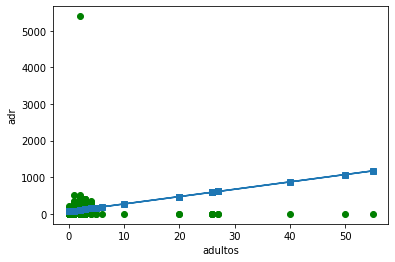

In [23]:
plt.figure()
plt.plot(adultos, adr, 'og')
plt.xlabel('adultos')
plt.ylabel('adr')
plt.plot(adultos,res.predict(), '-s')

Se presentan valorer atípicos mientras más grande sea el número de adultos.

R-ajustada muy baja, por lo que el modelo no es bueno para predecir el ADR en función de la cantidad de adultos en la reservación.

El coeficiente de determinación es muy bajo, por lo que el ajuste que esta realizando el modelo es poco significativo.

# Ecuación del Modelo de Regresión
# F(x)=B0+B1*x
# ADR=64.48+20.12*adultos
Para 4 adultos:

# ADR(4)=64.48+20.12*(4)
# ADR(4)=144.87 dls

In [24]:
res.predict()

array([104.72050975, 104.72050975,  84.59894775, ..., 104.72050975,
       104.72050975, 104.72050975])

(array([1.00000e+01, 1.16947e+05, 2.43200e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1171.16329545,  -524.51901688,   122.12526169,   768.76954026,
         1415.41381883,  2062.0580974 ,  2708.70237597,  3355.34665454,
         4001.99093311,  4648.63521168,  5295.27949025]),
 <a list of 10 Patch objects>)

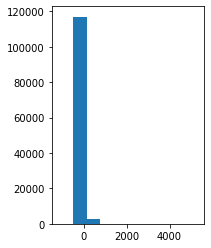

In [25]:
residuos = adr - res.predict()
residuos
plt.subplot(1,2,2)
plt.hist(residuos)

No se cumple con la prueba de normalidad debido a que la curtosis es muy elevada, esto es visible en el cesgo muy grande en el lado izquierdo de los residuos.

# Conclusiones Finales y Recomendaciones

1. Buscar más variables relevantes acerca del cliente que ayuden a realizar un mejor modelo de predicción para el ADR, debido a que este es un indicador importante en el mundo de la hotelería.

2. El realizar un modelo multivariable podría ayudar a explicar el ADR de una mejor forma, sin embargo esto siempre va a depender de la relación que guarde cada variable con el ADR, es por esto que es importante el definir estas nueva variables de estudio para que guarden una relación más fuerte con la variable dependiente.